In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

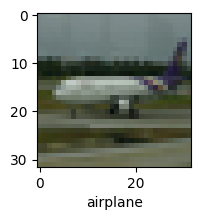

In [10]:
plot_sample(X_train, y_train, 233)

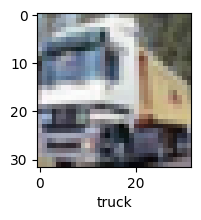

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 151s 96ms/step - loss: 1.8087 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 148s 95ms/step - loss: 1.6191 - accuracy: 0.4280
Epoch 3/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.5419 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4797 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.4292 - accuracy: 0.4981


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 32ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.62      0.57      1000
           1       0.55      0.68      0.61      1000
           2       0.33      0.37      0.35      1000
           3       0.40      0.24      0.30      1000
           4       0.45      0.28      0.35      1000
           5       0.54      0.19      0.28      1000
           6       0.31      0.85      0.46      1000
           7       0.70      0.38      0.49      1000
           8       0.69      0.52      0.60      1000
           9       0.56      0.49      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4697 - accuracy: 0.4682
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1154 - accuracy: 0.6069
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9855 - accuracy: 0.6557
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9035 - accuracy: 0.6863
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8303 - accuracy: 0.7126
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7790 - accuracy: 0.7291
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7285 - accuracy: 0.7468
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6891 - accuracy: 0.7598
Epoch 9/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6462 - accuracy: 0.7740
Epoch 10/10
1563/1563 [==============================] - 68s 44m

In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      1000
           1       0.79      0.84      0.81      1000
           2       0.52      0.64      0.57      1000
           3       0.58      0.39      0.47      1000
           4       0.65      0.58      0.61      1000
           5       0.69      0.51      0.59      1000
           6       0.66      0.84      0.74      1000
           7       0.76      0.72      0.74      1000
           8       0.72      0.87      0.79      1000
           9       0.78      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9402 - accuracy: 0.6863


[0.9402127861976624, 0.6862999796867371]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[1.7083006e-02, 1.4214685e-04, 9.8732105e-03, 7.1528023e-01,
        3.6083374e-04, 1.8837469e-02, 6.7329830e-03, 4.7073487e-04,
        2.2125442e-01, 9.9649634e-03],
       [5.6637065e-03, 2.0564668e-02, 4.4995559e-06, 1.0398073e-05,
        3.0730647e-09, 3.2590311e-08, 1.5883460e-08, 8.7006534e-11,
        9.7374821e-01, 8.4990761e-06],
       [3.9775446e-02, 2.2245045e-01, 1.1986220e-03, 1.6113745e-02,
        6.8112719e-04, 1.2922386e-03, 7.1560405e-04, 1.0968823e-03,
        6.9168949e-01, 2.4986373e-02],
       [5.6002921e-01, 1.6839828e-02, 5.0140428e-04, 1.8727552e-04,
        1.5869944e-05, 5.2013604e-07, 5.1423471e-05, 1.9519050e-06,
        4.2161739e-01, 7.5505552e-04],
       [2.3668633e-06, 5.7022726e-06, 4.5023058e-03, 7.2993413e-02,
        9.0444647e-02, 2.7031554e-03, 8.2932031e-01, 1.6457830e-05,
        1.0951418e-05, 7.4314755e-07]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

'horse'

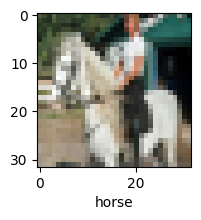

In [26]:
index=56
plot_sample(X_test, y_test,index)


classes[y_classes[index]]